In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [48]:
FI_matrix = pd.read_csv('FI_across_iterations.csv', index_col=0, delimiter=';')
FI_matrix = FI_matrix.T
FI_matrix

FI,RF_SG_msi,XGB_SG_msi,RF_SG_stage,XGB_SG_stage,RF_SG_TL,XGB_SG_TL,RF_FMG_HC,XGB_FMG_HC,RF_FMG_stage,XGB_FMG_stage,RF_FMG_TL,XGB_FMG_TL,RF_TCGA_ST,XGB_TCGA_ST
1,g__Achromobacter,g__Ramlibacter,g__Cloacibacillus,g__Cloacibacillus,g__Turicimonas,g__Segatella,g_Peptostreptococcus,g_Gelria,g_Parvimonas,g_Psychroflexus,g_Cosenzaea,g_Saccharibacillus,g__Faecalibacterium,g__Kangiella
2,g__Akkermansia,g__Proteus,g__Odoribacter,g__Simiaoa,g__Sutterella,g__Gemella,g_ Lachnospira,g_Simplicispira,g_ Peptostreptococcus,g_ Geofilum,g_ Orbus,g_ Orbus,g__Agrobacterium,g__Marinospirillum
3,g__Proteus,g__Limnohabitans,g__Anaerotignum,g__Oscillibacter,g__Anaerostipes,g__Enterocloster,g_ Lactobacillus,g_Rufibacter,g_ Bifidobacterium,g_ Phocoenobacter,g_ Malikia,g_ Phaseolibacter,g__Parabacteroides,g__Parabacteroides
4,g__Peptoniphilus,g__Peptoniphilus,g__Barnesiella,g__Paraprevotella,g__Selenomonas,g__Flavonifractor,g_ Centipeda,g_Meniscus,g_ Phascolarctobacterium,g_ Owenweeksia,g_ Lachnospira,g_ Cosenzaea,g__Dorea,g__Dorea
5,g__Treponema,g__Klebsiella,g__Oscillibacter,g__Odoribacter,g__Peptoniphilus,g__Mogibacterium,g_ Solobacterium,g_Streptosporangium,g_ Anaerofustis,g_ Volucribacter,g_ Catonella,g_ Eikenella,g__Solobacterium,g__Alkanindiges
6,g__Duodenibacillus,g__Lachnoanaerobaculum,g__Porphyromonas,g__Sphaerotilus,g__Akkermansia,g__Caproicibacterium,g_ Zhizhongheella,g_Mariniphaga,g_ Lactovum,g_ Providencia,g_ Desulfoconvexum,g_ Cricetibacter,g__Roseburia,g__Amantichitinum
7,g__Leptotrichia,g__Rhodoluna,g__Chakrabartyella,g__Azospirillum,g__Agathobacter,g__Desulfovibrio,g_ Vitreoscilla,g_Tahibacter,g_ Syntrophococcus,g_ Coenonia,g_ Cricetibacter,g_ Salinirepens,g__Coprococcus,g__Listeria
8,g__Selenomonas,g__Achromobacter,g__Paraprevotella,g__Anaerotignum,g__Blautia,g__Akkermansia,g_ Vogesella,g_Sediminitomix,g_ Sphingobacterium,g_ Pelistega,g_ Dolosicoccus,g_ Paucimonas,g__Alkalibacterium,g__Agrobacterium
9,g__Hydrogenophaga,g__Hydrogenophaga,g__Pusillibacter,g__Aquitalea,g__Vescimonas,g__Mycolicibacterium,g_ Romboutsia,g_Atopobium,g_ Bombiscardovia,g_ Thermoanaerobacterium,g_ Tamlicoccus,g_ Chthonomonas,g__Prevotella,g__Grimontia
10,g__Rhodoluna,g__Parabacteroides,g__Emergencia,g__Roseburia,g__Anaerocolumna,g__Ligilactobacillus,g_ Atopobium,g_ Leptotrichia,g_ Geofilum,g_ Chitinivibrio,g_ Eikenella,g_ Yimella,g__Listeria,g__Paeniclostridium


In [49]:
# Melt the DataFrame to have a single column of microbe names
melted_df = FI_matrix.melt(value_name='microbe', var_name='model')

# Count occurrences of each microbe
microbe_counts = melted_df['microbe'].value_counts()

In [50]:
# Filter out microbes that occur only once
microbes_to_keep = microbe_counts[microbe_counts > 1].index

# Filter the original DataFrame
filtered_df = FI_matrix.applymap(lambda x: x if x in microbes_to_keep else None)

filtered_df

C:\Users\Zhongyuan\AppData\Local\Temp\ipykernel_24940\2470248388.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


FI,RF_SG_msi,XGB_SG_msi,RF_SG_stage,XGB_SG_stage,RF_SG_TL,XGB_SG_TL,RF_FMG_HC,XGB_FMG_HC,RF_FMG_stage,XGB_FMG_stage,RF_FMG_TL,XGB_FMG_TL,RF_TCGA_ST,XGB_TCGA_ST
1,None,None,g__Cloacibacillus,g__Cloacibacillus,None,None,None,None,None,None,None,None,None,None
2,g__Akkermansia,g__Proteus,g__Odoribacter,None,None,None,g_ Lachnospira,None,None,g_ Geofilum,g_ Orbus,g_ Orbus,g__Agrobacterium,None
3,g__Proteus,g__Limnohabitans,g__Anaerotignum,g__Oscillibacter,g__Anaerostipes,None,g_ Lactobacillus,None,None,None,None,None,g__Parabacteroides,g__Parabacteroides
4,g__Peptoniphilus,g__Peptoniphilus,None,g__Paraprevotella,g__Selenomonas,None,None,None,None,None,g_ Lachnospira,None,g__Dorea,g__Dorea
5,g__Treponema,g__Klebsiella,g__Oscillibacter,g__Odoribacter,g__Peptoniphilus,g__Mogibacterium,None,None,None,None,None,g_ Eikenella,None,None
6,None,g__Lachnoanaerobaculum,g__Porphyromonas,None,g__Akkermansia,g__Caproicibacterium,g_ Zhizhongheella,None,None,None,g_ Desulfoconvexum,g_ Cricetibacter,None,None
7,g__Leptotrichia,g__Rhodoluna,g__Chakrabartyella,None,g__Agathobacter,g__Desulfovibrio,None,None,None,None,g_ Cricetibacter,None,None,g__Listeria
8,g__Selenomonas,None,g__Paraprevotella,g__Anaerotignum,None,g__Akkermansia,None,None,None,None,None,None,None,g__Agrobacterium
9,g__Hydrogenophaga,g__Hydrogenophaga,g__Pusillibacter,None,g__Vescimonas,None,None,None,g_ Bombiscardovia,None,None,None,None,None
10,g__Rhodoluna,None,g__Emergencia,None,None,None,None,None,g_ Geofilum,None,g_ Eikenella,None,g__Listeria,None


In [51]:
# Melt the DataFrame to have a single column of microbe names
melted_df = filtered_df.melt(value_name='microbe', var_name='model')

# Count occurrences of each microbe
microbe_counts = melted_df['microbe'].value_counts()

# Filter out microbes that occur only once
filtered_microbe_counts = microbe_counts[microbe_counts > 1]

# Convert the filtered counts to a DataFrame for better readability
ranked_microbes = filtered_microbe_counts.reset_index()
ranked_microbes.columns = ['microbe', 'frequency']

# Sort the DataFrame by frequency in descending order
ranked_microbes = ranked_microbes.sort_values(by='frequency', ascending=False)

# Initialize a new DataFrame with microbe names as index and model names as columns
ranked_microbe_list = ranked_microbes['microbe']
result_df = pd.DataFrame(index=ranked_microbe_list, columns=filtered_df.columns)

# Fill the DataFrame with frequencies
for model in filtered_df.columns:
    model_microbes = filtered_df[model]
    for rank, microbe in enumerate(model_microbes):
        if microbe in result_df.index:
            result_df.loc[microbe, model] = filtered_microbe_counts[microbe]

# Fill NaN values with None
result_df = result_df.where(pd.notnull(result_df), None)

result_df

FI,RF_SG_msi,XGB_SG_msi,RF_SG_stage,XGB_SG_stage,RF_SG_TL,XGB_SG_TL,RF_FMG_HC,XGB_FMG_HC,RF_FMG_stage,XGB_FMG_stage,RF_FMG_TL,XGB_FMG_TL,RF_TCGA_ST,XGB_TCGA_ST
microbe,,,,,,,,,,,,,,
g__Akkermansia,4,4,None,None,4,4,None,None,None,None,None,None,None,None
g__Porphyromonas,None,None,4,4,4,4,None,None,None,None,None,None,None,None
g__Vescimonas,None,3,None,3,3,None,None,None,None,None,None,None,None,None
g__Rhodoluna,3,3,3,None,None,None,None,None,None,None,None,None,None,None
g__Peptoniphilus,3,3,None,None,3,None,None,None,None,None,None,None,None,None
g__Selenomonas,3,3,None,None,3,None,None,None,None,None,None,None,None,None
g__Vibrio,None,None,3,3,None,3,None,None,None,None,None,None,None,None
g__Lachnoanaerobaculum,3,3,None,None,3,None,None,None,None,None,None,None,None,None
g__Oscillibacter,None,None,3,3,None,3,None,None,None,None,None,None,None,None


C:\Users\Zhongyuan\AppData\Local\Temp\ipykernel_24940\518953792.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


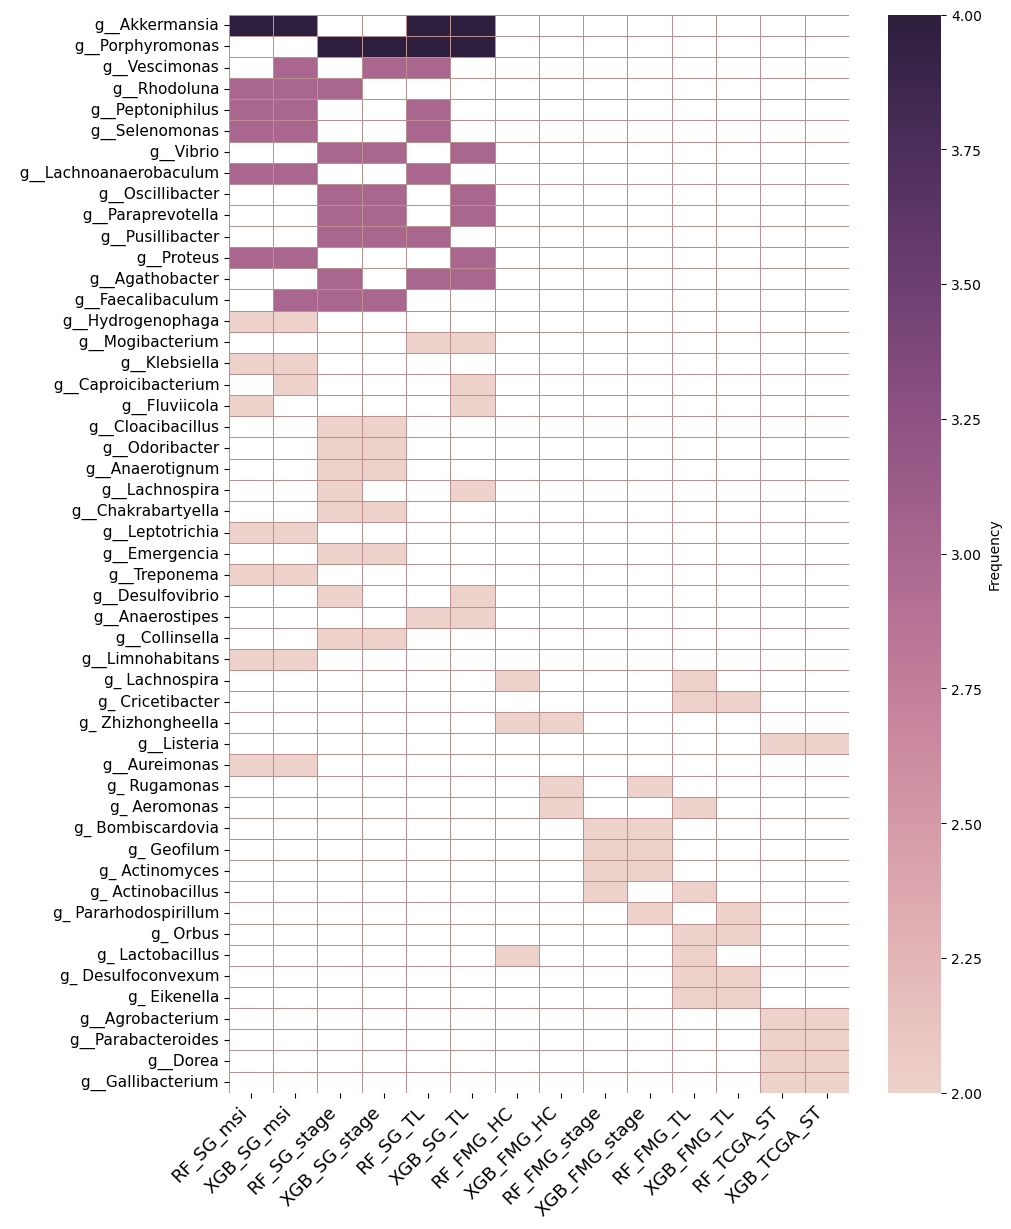

In [62]:
# Replace None with NaN for better visualization in heatmap
result_df = result_df.applymap(lambda x: x if x is not None else float('nan'))

# Convert all values in the DataFrame to numeric, forcing any non-numeric values to NaN and then to 0
#result_df = result_df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Create a heatmap with broader lines between cells
plt.figure(figsize=(10, 14))
heatmap = sns.heatmap(result_df, annot=False, cmap=sns.cubehelix_palette(as_cmap=True), cbar_kws={'label': 'Frequency'}, linewidths=0.5, linecolor='rosybrown')

plt.xlabel('')
plt.ylabel('')
plt.title('')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.yticks(fontsize=11)

# Display the heatmap
plt.show()